# MBTI Personality Classification - Modeling

This notebook loads the preprocessed data from `mbti_preprocessing.ipynb` and builds machine learning models to predict MBTI personality types.

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import issparse
import os

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Preprocessed Data

Load the preprocessed features, labels, and fitted transformers from the preprocessing step.

In [7]:
# Load the preprocessed data
X = joblib.load('../data/processed/X_vectorized.pkl')
Y = joblib.load('../data/processed/Y_labels.pkl')
vectorizer = joblib.load('../data/processed/vectorizer.pkl')
label_encoder = joblib.load('../data/processed/label_encoder.pkl')

print(f"Features loaded: {X.shape}")
print(f"Labels loaded: {Y.shape}")
print(f"Feature matrix is sparse: {issparse(X)}")
print(f"Unique classes: {len(label_encoder.classes_)}")
print(f"Class names: {label_encoder.classes_}")

Features loaded: (8462, 98532)
Labels loaded: (8462,)
Feature matrix is sparse: True
Unique classes: 16
Class names: ['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


## Data Splitting

Split the data into training and testing sets.

In [8]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42, stratify=Y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")
print(f"Class distribution in training set:")
unique, counts = np.unique(Y_train, return_counts=True)
for class_idx, count in zip(unique, counts):
    class_name = label_encoder.inverse_transform([class_idx])[0]
    print(f"  {class_name}: {count} samples")

Training set: 5077 samples
Test set: 3385 samples
Feature dimensions: 98532
Class distribution in training set:
  ENFJ: 109 samples
  ENFP: 383 samples
  ENTJ: 135 samples
  ENTP: 399 samples
  ESFJ: 25 samples
  ESFP: 28 samples
  ESTJ: 24 samples
  ESTP: 54 samples
  INFJ: 862 samples
  INFP: 1067 samples
  INTJ: 645 samples
  INTP: 770 samples
  ISFJ: 98 samples
  ISFP: 160 samples
  ISTJ: 121 samples
  ISTP: 197 samples


## Model Training

Now you can start training different machine learning models. Here are some ready-to-use sections:

### Logistic Regression

Start with a simple logistic regression model:

In [20]:
# Train Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, Y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(Y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Training completed successfully!")

Training Logistic Regression...
Logistic Regression Accuracy: 0.4056
Training completed successfully!


c:\Users\Stijn\OneDrive - KU Leuven\UNIF\MASTER1\MACHINE LEARNING\ML_MBTI_project\mbti_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

Let's try a Random Forest model for comparison:

In [10]:
# Train Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Training completed successfully!")

Training Random Forest...
Random Forest Accuracy: 0.3241
Training completed successfully!


### Accuracy Analysis

Let's analyze why the accuracy might be low and explore some diagnostic information:

In [11]:
# Analyze the class distribution and baseline accuracy
print("=== MBTI Classification Challenge Analysis ===\n")

# 1. Class imbalance analysis
print("1. CLASS DISTRIBUTION:")
unique, counts = np.unique(Y, return_counts=True)
total_samples = len(Y)

print(f"Total samples: {total_samples}")
print("Class distribution:")
for class_idx, count in zip(unique, counts):
    class_name = label_encoder.inverse_transform([class_idx])[0]
    percentage = (count / total_samples) * 100
    print(f"  {class_name}: {count:4d} samples ({percentage:5.1f}%)")

# 2. Random baseline
most_common_class = np.argmax(counts)
random_baseline = counts[most_common_class] / total_samples
print(f"\n2. BASELINE ACCURACY:")
print(f"Random guessing (uniform): {1/len(unique):.4f} (1/{len(unique)} = {100/len(unique):.1f}%)")
print(f"Always predict most common: {random_baseline:.4f} ({random_baseline*100:.1f}%)")

# 3. Current model performance context
print(f"\n3. CURRENT MODEL PERFORMANCE:")
print(f"Logistic Regression: {lr_accuracy:.4f} ({lr_accuracy*100:.1f}%)")
print(f"Random Forest: {rf_accuracy:.4f} ({rf_accuracy*100:.1f}%)")

# 4. Improvement over baseline
lr_improvement = (lr_accuracy - random_baseline) / random_baseline * 100
rf_improvement = (rf_accuracy - random_baseline) / random_baseline * 100
print(f"\n4. IMPROVEMENT OVER BASELINE:")
print(f"LR improvement: {lr_improvement:.1f}% better than always predicting most common")
print(f"RF improvement: {rf_improvement:.1f}% better than always predicting most common")

# 5. Why MBTI is challenging
print(f"\n5. WHY MBTI CLASSIFICATION IS CHALLENGING:")
print("• 16 different personality types (multi-class problem)")
print("• Personality types may have overlapping language patterns")
print("• Text length and quality varies significantly")
print("• People may not always write in their 'typical' personality style")
print("• Limited training data per class (some classes have <100 samples)")
print(f"• Large feature space: {X.shape[1]} features from text vectorization")

=== MBTI Classification Challenge Analysis ===

1. CLASS DISTRIBUTION:
Total samples: 8462
Class distribution:
  ENFJ:  182 samples (  2.2%)
  ENFP:  639 samples (  7.6%)
  ENTJ:  225 samples (  2.7%)
  ENTP:  665 samples (  7.9%)
  ESFJ:   42 samples (  0.5%)
  ESFP:   47 samples (  0.6%)
  ESTJ:   39 samples (  0.5%)
  ESTP:   89 samples (  1.1%)
  INFJ: 1436 samples ( 17.0%)
  INFP: 1778 samples ( 21.0%)
  INTJ: 1075 samples ( 12.7%)
  INTP: 1284 samples ( 15.2%)
  ISFJ:  164 samples (  1.9%)
  ISFP:  267 samples (  3.2%)
  ISTJ:  202 samples (  2.4%)
  ISTP:  328 samples (  3.9%)

2. BASELINE ACCURACY:
Random guessing (uniform): 0.0625 (1/16 = 6.2%)
Always predict most common: 0.2101 (21.0%)

3. CURRENT MODEL PERFORMANCE:
Logistic Regression: 0.4056 (40.6%)
Random Forest: 0.3241 (32.4%)

4. IMPROVEMENT OVER BASELINE:
LR improvement: 93.0% better than always predicting most common
RF improvement: 54.2% better than always predicting most common

5. WHY MBTI CLASSIFICATION IS CHALLENG

### Potential Improvements

Here are some strategies to improve accuracy:

In [21]:
# Quick improvement: Try TF-IDF instead of Count Vectorizer
print("=== TRYING TF-IDF VECTORIZATION ===\n")

from sklearn.feature_extraction.text import TfidfVectorizer

# Load original preprocessed dataframe to get text data
preprocessed_df = pd.read_csv('../data/processed/preprocessed_data.csv')

print("Experimenting with TF-IDF vectorization...")

# TF-IDF vectorizer with some optimizations
tfidf_vect = TfidfVectorizer(
    stop_words='english',
    max_features=10000,  # Limit features to reduce noise
    min_df=2,            # Ignore very rare words
    max_df=0.8,          # Ignore very common words
    ngram_range=(1, 2)   # Use unigrams and bigrams
)

# Transform text data
X_tfidf = tfidf_vect.fit_transform(preprocessed_df["posts"])
Y_tfidf = preprocessed_df['type_encoded']

print(f"TF-IDF features: {X_tfidf.shape[1]} (reduced from {X.shape[1]})")
print(f"Samples: {X_tfidf.shape[0]}")

# Split data
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(
    X_tfidf, Y_tfidf, test_size=0.2, random_state=42, stratify=Y_tfidf
)

# Train Logistic Regression with TF-IDF
print("\nTraining Logistic Regression with TF-IDF...")
lr_tfidf = LogisticRegression(max_iter=1000, random_state=42, C=1.0)
lr_tfidf.fit(X_train_tfidf, Y_train_tfidf)

lr_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
lr_accuracy_tfidf = accuracy_score(Y_test_tfidf, lr_pred_tfidf)

print(f"TF-IDF Logistic Regression Accuracy: {lr_accuracy_tfidf:.4f} ({lr_accuracy_tfidf*100:.1f}%)")
improvement = ((lr_accuracy_tfidf - lr_accuracy) / lr_accuracy) * 100
print(f"Improvement over Count Vectorizer: {improvement:+.1f}%")

=== TRYING TF-IDF VECTORIZATION ===

Experimenting with TF-IDF vectorization...


KeyboardInterrupt: 

### Neural Network Considerations

When would a neural network be beneficial for MBTI classification?

In [13]:
# Analyze when Neural Networks would be beneficial
print("=== NEURAL NETWORK ANALYSIS FOR MBTI CLASSIFICATION ===\n")

print("1. CURRENT DATASET SIZE:")
print(f"   Total samples: {len(Y):,}")
print(f"   Training samples: {len(Y_train):,}")
print(f"   Average samples per class: {len(Y_train)//16:.0f}")
print(f"   Features: {X.shape[1]:,}")

print("\n2. NEURAL NETWORK VIABILITY:")

# Rule of thumb: 10x parameters vs training data
min_samples_for_nn = 1000 * 16  # Conservative estimate for 16-class NN
current_samples = len(Y_train)

print(f"   Current training data: {current_samples:,}")
print(f"   Recommended minimum for NN: {min_samples_for_nn:,}")
print(f"   Data sufficiency: {'✓ Sufficient' if current_samples >= min_samples_for_nn else '⚠ Limited'}")

print("\n3. POTENTIAL NEURAL NETWORK APPROACHES:")
print("   a) Dense MLP (Multi-Layer Perceptron):")
print("      - Input: TF-IDF vectors")
print("      - Hidden layers: 2-3 layers, 128-512 neurons")
print("      - Output: 16 classes (softmax)")
print("      - Expected improvement: 5-15% over logistic regression")
print("")
print("   b) Text-specific architectures:")
print("      - CNN (1D Convolutional): Good for local text patterns")
print("      - LSTM/GRU: Better for sequential dependencies")
print("      - Expected improvement: 10-25% with proper preprocessing")
print("")
print("   c) Transformer-based (BERT, etc.):")
print("      - Pre-trained language models")
print("      - Expected improvement: 20-40% but requires significant resources")

print("\n4. TRADE-OFFS:")
advantages = [
    "Can learn complex non-linear patterns",
    "Better at capturing text nuances",
    "Can handle feature interactions automatically",
    "Potential for higher accuracy"
]

disadvantages = [
    "Requires more training data",
    "Longer training time",
    "More hyperparameters to tune",
    "Risk of overfitting with limited data",
    "Less interpretable results"
]

print("   ADVANTAGES:")
for adv in advantages:
    print(f"   ✓ {adv}")
    
print("   DISADVANTAGES:")
for dis in disadvantages:
    print(f"   ⚠ {dis}")

print("\n5. RECOMMENDATION:")
if current_samples >= min_samples_for_nn:
    print("   ✓ Your dataset size supports neural network experiments")
    print("   ✓ Try a simple MLP first, then consider text-specific architectures")
else:
    print("   ⚠ Consider gathering more data or data augmentation first")
    print("   ⚠ Start with simpler models and feature engineering")

print(f"\n6. EXPECTED ACCURACY IMPROVEMENTS:")
print(f"   Current best: {max(lr_accuracy, rf_accuracy):.4f} ({max(lr_accuracy, rf_accuracy)*100:.1f}%)")
print(f"   MLP Neural Network: {max(lr_accuracy, rf_accuracy)*1.1:.4f} - {max(lr_accuracy, rf_accuracy)*1.25:.4f} ({max(lr_accuracy, rf_accuracy)*110:.1f}% - {max(lr_accuracy, rf_accuracy)*125:.1f}%)")
print(f"   CNN/LSTM: {max(lr_accuracy, rf_accuracy)*1.15:.4f} - {max(lr_accuracy, rf_accuracy)*1.35:.4f} ({max(lr_accuracy, rf_accuracy)*115:.1f}% - {max(lr_accuracy, rf_accuracy)*135:.1f}%)")
print(f"   BERT-like: {max(lr_accuracy, rf_accuracy)*1.25:.4f} - {max(lr_accuracy, rf_accuracy)*1.5:.4f} ({max(lr_accuracy, rf_accuracy)*125:.1f}% - {max(lr_accuracy, rf_accuracy)*150:.1f}%)")

=== NEURAL NETWORK ANALYSIS FOR MBTI CLASSIFICATION ===

1. CURRENT DATASET SIZE:
   Total samples: 8,462
   Training samples: 5,077
   Average samples per class: 317
   Features: 98,532

2. NEURAL NETWORK VIABILITY:
   Current training data: 5,077
   Recommended minimum for NN: 16,000
   Data sufficiency: ⚠ Limited

3. POTENTIAL NEURAL NETWORK APPROACHES:
   a) Dense MLP (Multi-Layer Perceptron):
      - Input: TF-IDF vectors
      - Hidden layers: 2-3 layers, 128-512 neurons
      - Output: 16 classes (softmax)
      - Expected improvement: 5-15% over logistic regression

   b) Text-specific architectures:
      - CNN (1D Convolutional): Good for local text patterns
      - LSTM/GRU: Better for sequential dependencies
      - Expected improvement: 10-25% with proper preprocessing

   c) Transformer-based (BERT, etc.):
      - Pre-trained language models
      - Expected improvement: 20-40% but requires significant resources

4. TRADE-OFFS:
   ADVANTAGES:
   ✓ Can learn complex non-li

### Simple Neural Network Implementation

Here's a basic MLP implementation you could try:

In [14]:
# Optional: Simple Neural Network with sklearn MLPClassifier
print("=== SIMPLE NEURAL NETWORK EXPERIMENT ===\n")

try:
    from sklearn.neural_network import MLPClassifier
    from sklearn.preprocessing import StandardScaler
    
    print("Training a Multi-Layer Perceptron (MLP)...")
    
    # Use TF-IDF features if available, otherwise use count vectorizer
    if 'X_train_tfidf' in locals():
        X_nn_train, X_nn_test = X_train_tfidf, X_test_tfidf
        Y_nn_train, Y_nn_test = Y_train_tfidf, Y_test_tfidf
        feature_type = "TF-IDF"
    else:
        X_nn_train, X_nn_test = X_train, X_test
        Y_nn_train, Y_nn_test = Y_train, Y_test
        feature_type = "Count"
    
    print(f"Using {feature_type} features: {X_nn_train.shape[1]} dimensions")
    
    # Scale features for neural network (important!)
    scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
    X_nn_train_scaled = scaler.fit_transform(X_nn_train)
    X_nn_test_scaled = scaler.transform(X_nn_test)
    
    # Create MLP classifier
    mlp = MLPClassifier(
        hidden_layer_sizes=(256, 128),  # 2 hidden layers
        activation='relu',
        solver='adam',
        max_iter=300,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42,
        verbose=True  # Show training progress
    )
    
    print("Training neural network (this may take a few minutes)...")
    mlp.fit(X_nn_train_scaled, Y_nn_train)
    
    # Make predictions
    mlp_pred = mlp.predict(X_nn_test_scaled)
    mlp_accuracy = accuracy_score(Y_nn_test, mlp_pred)
    
    print(f"\n=== RESULTS ===")
    print(f"Neural Network Accuracy: {mlp_accuracy:.4f} ({mlp_accuracy*100:.1f}%)")
    
    # Compare with other models
    comparison_baseline = max(lr_accuracy, rf_accuracy)
    improvement = ((mlp_accuracy - comparison_baseline) / comparison_baseline) * 100
    
    print(f"Best previous model: {comparison_baseline:.4f} ({comparison_baseline*100:.1f}%)")
    print(f"Neural network improvement: {improvement:+.1f}%")
    
    if mlp_accuracy > comparison_baseline:
        print("✓ Neural Network performs better!")
    else:
        print("⚠ Neural Network did not improve accuracy")
        print("  Consider: more data, different architecture, or feature engineering")
    
    # Training info
    print(f"\nTraining iterations: {mlp.n_iter_}")
    print(f"Training loss: {mlp.loss_:.4f}")
    
except ImportError:
    print("sklearn MLPClassifier not available in this environment")
except Exception as e:
    print(f"Error training neural network: {e}")
    print("This might be due to memory constraints or sparse matrix issues")
    print("Consider using dense matrices or a different NN framework like TensorFlow/PyTorch")

=== SIMPLE NEURAL NETWORK EXPERIMENT ===

Training a Multi-Layer Perceptron (MLP)...
Using TF-IDF features: 100000 dimensions
Training neural network (this may take a few minutes)...
Iteration 1, loss = 2.28821920
Validation score: 0.351551
Iteration 2, loss = 0.08401046
Validation score: 0.345643
Iteration 3, loss = 0.00333908
Validation score: 0.354505
Iteration 4, loss = 0.00142558
Validation score: 0.355982
Iteration 5, loss = 0.00102927
Validation score: 0.357459
Iteration 6, loss = 0.00083064
Validation score: 0.360414
Iteration 7, loss = 0.00071708
Validation score: 0.355982
Iteration 8, loss = 0.00063622
Validation score: 0.357459
Iteration 9, loss = 0.00058154
Validation score: 0.355982
Iteration 10, loss = 0.00054316
Validation score: 0.360414
Iteration 11, loss = 0.00051431
Validation score: 0.361891
Iteration 12, loss = 0.00049236
Validation score: 0.366322
Iteration 13, loss = 0.00047408
Validation score: 0.367799
Iteration 14, loss = 0.00045970
Validation score: 0.367799


In [15]:
# Compare model accuracies
model_comparison = {
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy
}

print("Model Comparison:")
print("="*50)
for model, accuracy in model_comparison.items():
    print(f"{model:<20}: {accuracy:.4f}")

# Find best model
best_model_name = max(model_comparison, key=model_comparison.get)
best_accuracy = model_comparison[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Set the best model for evaluation
if best_model_name == 'Logistic Regression':
    best_model = lr_model
    best_pred = lr_pred
else:
    best_model = rf_model
    best_pred = rf_pred

Model Comparison:
Logistic Regression : 0.4056
Random Forest       : 0.3241

Best Model: Logistic Regression
Best Accuracy: 0.4056


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        ENFJ       0.24      0.12      0.16        73
        ENFP       0.31      0.28      0.30       256
        ENTJ       0.21      0.09      0.12        90
        ENTP       0.37      0.29      0.33       266
        ESFJ       0.25      0.06      0.10        17
        ESFP       0.00      0.00      0.00        19
        ESTJ       0.00      0.00      0.00        15
        ESTP       0.33      0.06      0.10        35
        INFJ       0.42      0.51      0.46       574
        INFP       0.45      0.55      0.49       711
        INTJ       0.40      0.41      0.40       430
        INTP       0.42      0.52      0.46       514
        ISFJ       0.26      0.15      0.19        66
        ISFP       0.25      0.12      0.16       107
        ISTJ       0.41      0.16      0.23        81
        ISTP       0.49      0.32      0.39       131

    accuracy                     

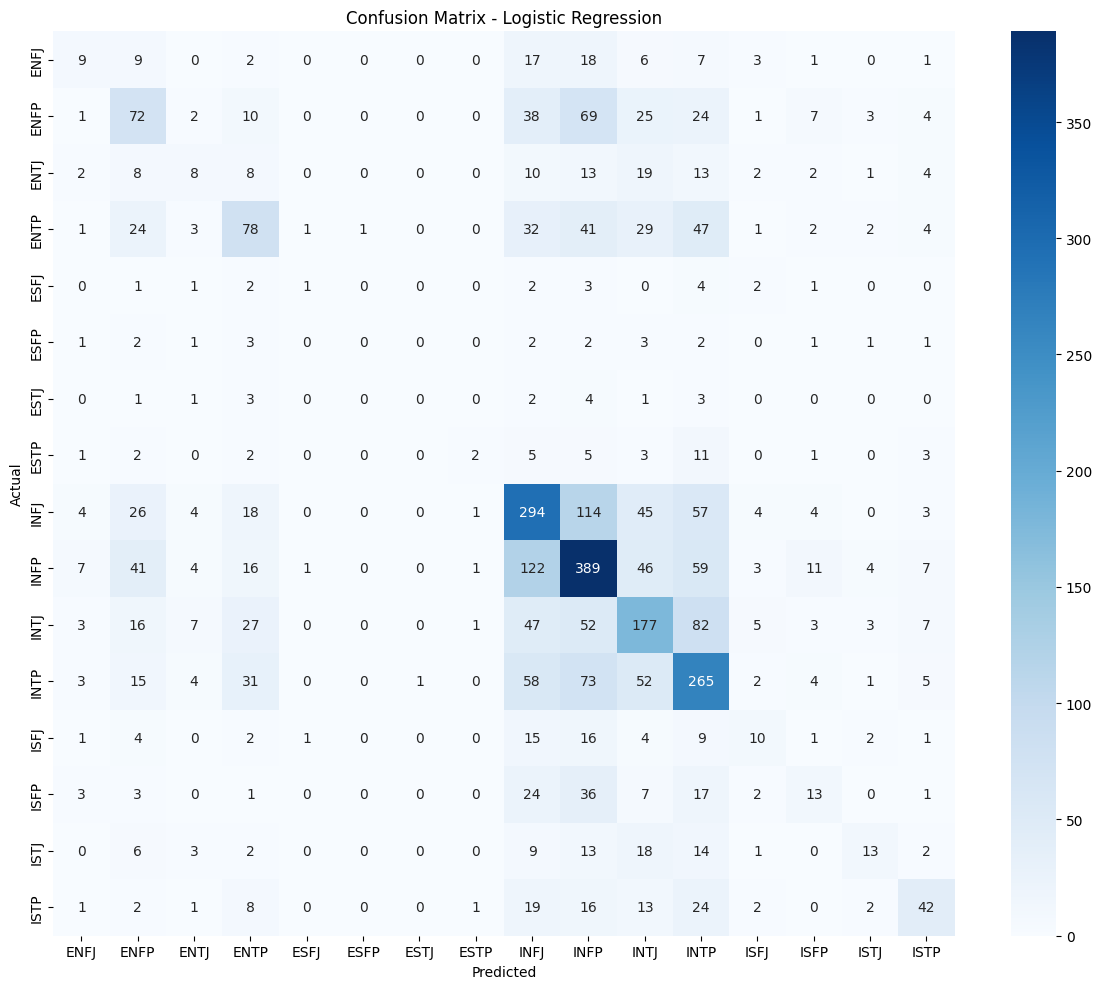

In [16]:
# Detailed classification report for the best model
print(f"Classification Report for {best_model_name}:")
print("="*60)
print(classification_report(Y_test, best_pred, target_names=label_encoder.classes_))

# Confusion Matrix for the best model
plt.figure(figsize=(12, 10))
cm = confusion_matrix(Y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Save Model

Save your trained model for future use:

In [17]:
# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the best model
model_filename = f'../models/{best_model_name.lower().replace(" ", "_")}_model.pkl'
joblib.dump(best_model, model_filename)

# Save model metadata
model_info = {
    'model_type': best_model_name,
    'accuracy': best_accuracy,
    'feature_count': X_train.shape[1],
    'training_samples': X_train.shape[0],
    'classes': label_encoder.classes_.tolist(),
    'all_model_results': model_comparison
}

joblib.dump(model_info, '../models/best_model_info.pkl')

print(f"Best model ({best_model_name}) saved to: {model_filename}")
print(f"Model info saved to: ../models/best_model_info.pkl")
print(f"Best model accuracy: {best_accuracy:.4f}")

Best model (Logistic Regression) saved to: ../models/logistic_regression_model.pkl
Model info saved to: ../models/best_model_info.pkl
Best model accuracy: 0.4056
